In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage as ndi
import glob

from PIL import Image
from numpy import asarray

from scipy.sparse import csr_matrix

from joblib import Parallel, delayed
from tqdm import tqdm

import os

In [97]:
mask_file = "../../input/masks/supplementary_workflow/08_mask.png"

In [98]:
Image.MAX_IMAGE_PIXELS = 10000000000

# load the image
image = Image.open(mask_file)

In [99]:
# convert image to numpy array
data = asarray(image)

In [100]:
data.shape

(1000, 1000)

In [77]:
data = data[~np.all(data == 0, axis=1)]
data = data[:,~np.all(data == 0, axis=0)]

In [90]:
data = data[750:1000, 750:1000]

In [101]:
# label the objects
label_objects, nb_labels = ndi.label(data)

In [102]:
nb_labels

326

In [103]:
np.median(data)

0.0

In [104]:
label_objects

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

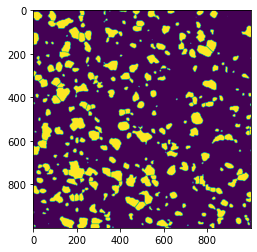

In [105]:
plt.imshow(data)

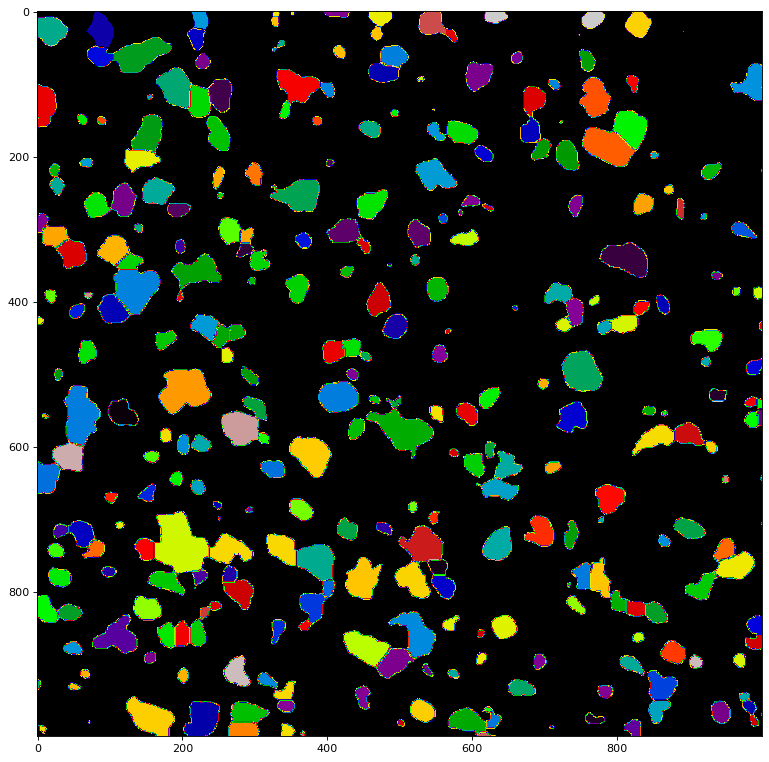

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12), dpi=80)

vals = np.linspace(0,1,256)
np.random.shuffle(vals)
vals = np.insert(arr = vals[vals!=0], obj=0, values=0)
cmap = plt.cm.colors.ListedColormap(plt.cm.nipy_spectral(vals))

plt.imshow(label_objects, cmap=cmap)

plt.savefig('../../output/figures/supplementary/cell_ids_labelled.png', bbox_inches='tight')

In [108]:
label_objects[250:270, 250:270]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [81, 81, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [81, 81, 81, 81, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [81, 81, 81, 81, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [81, 81, 81, 81, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [81, 81, 81, 81, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [81, 81, 81, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [81, 81, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [ ]:
Image.MAX_IMAGE_PIXELS = 10000000000

print(sample_name)

mask_file = mask_dict[sample_name]
gem_file = gem_dict[sample_name]

# load the gem counts
# df = pd.read_csv(gem_file, header = 0, sep = "\t").set_index(['x', 'y'])

# load the image
image = Image.open(mask_file)
# convert image to numpy array
data = asarray(image)
# label the objects
label_objects, nb_labels = ndi.label(data)